In [17]:
import pandas as pd
import numpy as np

In [18]:
# Create a series
pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

a   -1.048497
b    0.252705
c    0.531824
d    0.414078
e   -0.959667
dtype: float64

In [19]:
# Preserve the series in variable for later access
s = pd.Series(np.random.randn(5))
print(s)

0   -0.022684
1    0.106860
2    0.249404
3    1.747483
4   -0.065692
dtype: float64


In [20]:
# Index
print(s[0])
print("\n")
print(s[:3])

-0.0226844928798


0   -0.022684
1    0.106860
2    0.249404
dtype: float64


In [21]:
# Create a datafrace
df = pd.DataFrame(s, columns = ["Column 1"])
df

,Column 1
0,-0.022684
1,0.106860
2,0.249404
3,1.747483
4,-0.065692


In [22]:
# Can access columns by name
df['Column 1']

0   -0.022684
1    0.106860
2    0.249404
3    1.747483
4   -0.065692
Name: Column 1, dtype: float64

In [23]:
# Easy to add columns
df['Column 2'] = df['Column 1'] * 4
df

,Column 1,Column 2
0,-0.022684,-0.090738
1,0.106860,0.427440
2,0.249404,0.997614
3,1.747483,6.989933
4,-0.065692,-0.262768


In [24]:
# Other manipulation, like sorting -- if you want to preserve, set equal to a var
df.sort_values(by = 'Column 2')

,Column 1,Column 2
4,-0.065692,-0.262768
0,-0.022684,-0.090738
1,0.106860,0.427440
2,0.249404,0.997614
3,1.747483,6.989933


In [25]:
# Boolean indexing
df[df['Column 2'] <= 2]

,Column 1,Column 2
0,-0.022684,-0.090738
1,0.106860,0.427440
2,0.249404,0.997614
4,-0.065692,-0.262768


In [28]:
df.apply(lambda x: min(x) + max(x))
np.mean(df)

Column 1    0.403074
Column 2    1.612296
dtype: float64

In [33]:
df.describe()

,Column 1,Column 2
count,5.000000,5.000000
mean,0.403074,1.612296
std,0.761545,3.046182
min,-0.065692,-0.262768
25%,-0.022684,-0.090738
50%,0.106860,0.427440
75%,0.249404,0.997614
max,1.747483,6.989933


In [36]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
plt.style.use('ggplot')

In [38]:
# Read in data into a dataframe
df = pd.read_csv('/Users/SG/Documents/Programming/pythonForData/climate-change-earth- surface-temperature/GlobalTemperatures.csv')

# Show the first 5 rows of the table
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Let's just consider the LandAverageTemperature
# "A primarily label-location based indexer"
df = df.ix[:,:2]
df.head()

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


In [40]:
df.describe()

,LandAverageTemperature
count,3180.000000
mean,8.374731
std,4.381310
min,-2.080000
25%,4.312000
50%,8.610500
75%,12.548250
max,19.021000


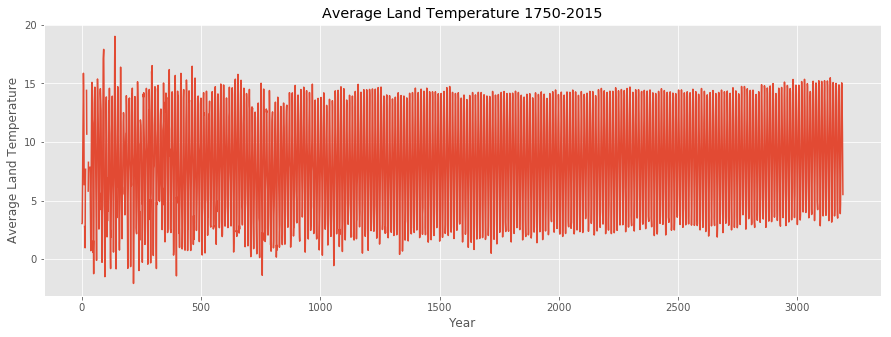

In [42]:
# Cursory plot
plt.figure(figsize = (15, 5))
plt.plot(df['LandAverageTemperature'])
plt.title("Average Land Temperature 1750-2015")
plt.xlabel("Year")
plt.ylabel("Average Land Temperature")
plt.show()

In [43]:
# Maybe we can try only by year?
# But notice that the dt column is made up of strings
print(type(df['dt'][0]))

<class 'str'>


In [44]:
# Convert to datetime object
times = pd.DatetimeIndex(df['dt'])

# Group by year
grouped = df.groupby([times.year]).mean()

<function matplotlib.pyplot.show>

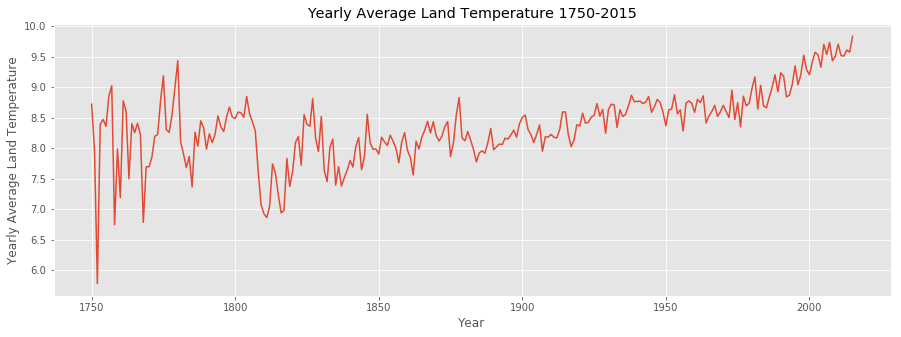

In [50]:
# Plot
plt.figure(figsize = (15, 5))
plt.plot(grouped['LandAverageTemperature'])

# Change features of the graph
plt.title("Yearly Average Land Temperature 1750-2015")
plt.xlabel("Year")
plt.ylabel("Yearly Average Land Temperature")
plt.show

In [46]:
# What caused those anomalies?
grouped.head()

,LandAverageTemperature
1750,8.719364
1751,7.976143
1752,5.779833
1753,8.388083
1754,8.469333


In [47]:
# Check what happened in 1752
df[times.year == 1752]

,dt,LandAverageTemperature
24,1752-01-01,0.348
25,1752-02-01,NaN
26,1752-03-01,5.806
27,1752-04-01,8.265
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN
31,1752-08-01,NaN
32,1752-09-01,NaN
33,1752-10-01,7.839


In [48]:
# There are a lot of null values! What else?
df[np.isnan(df['LandAverageTemperature'])]

,dt,LandAverageTemperature
10,1750-11-01,NaN
16,1751-05-01,NaN
18,1751-07-01,NaN
21,1751-10-01,NaN
22,1751-11-01,NaN
23,1751-12-01,NaN
25,1752-02-01,NaN
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN


In [49]:
# Use previous valid observation
df['LandAverageTemperatures'] = df['LandAverageTemperature'].fillna(method='ffill')

<function matplotlib.pyplot.show>

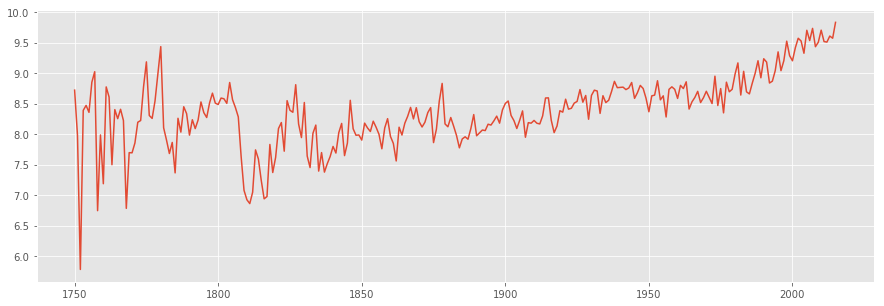

In [51]:
# Regroup and plot
grouped = df.groupby([times.year]).mean()

# Better, but still not perfect
# What are some other ways to fill the NaN values?
plt.figure(figsize = (15, 5))
plt.plot(grouped['LandAverageTemperature'])
plt.show

In [52]:
from sklearn.linear_model import LinearRegression as LinReg

In [56]:
x = grouped.index.values.reshape(-1, 1)
y = grouped['LandAverageTemperature'].values

In [58]:
reg = LinReg()
reg.fit(x, y)
y_preds = reg.predict(x)
print("Accuracy: " + str(reg.score(x, y)))

Accuracy: 0.387302697296


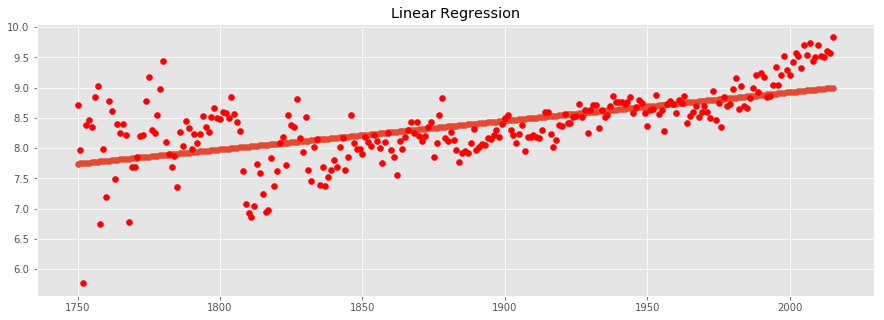

In [59]:
plt.figure(figsize = (15, 5))
plt.title("Linear Regression")
plt.scatter(x = x, y = y_preds)
plt.scatter(x = x, y = y, c = "r")

In [60]:
reg = LinReg()
reg.fit(x, y)
y_preds = reg.predict(x)
print("Accuracy: " + str(reg.score(x, y)))

Accuracy: 0.387302697296


In [61]:
reg.predict(2050)

array([ 9.16189553])